In [271]:
# compatibility with Python 2
from __future__ import print_function

# preprocess
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler

# To import the classifier (SVM classifier)
from sklearn.svm import SVC

# To measure accuracy
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# computes distance between each pair of two collections of inputs
from scipy.spatial.distance import pdist

# repaired matrix by averaging; probably the best can do without domain-specific information
from sklearn.utils.validation import check_symmetric

# clustering-related methods
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score 

# dimensionality reduction
from sklearn.decomposition import PCA

# support plots
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns; sns.set()
import networkx as nx

import numpy as np
import pandas as pd
import math

# To increase quality of figures
plt.rcParams["figure.figsize"] = (20, 7)

# display all the plots inline
%matplotlib inline

# fs-related operations
import os

# download files
import requests

#float_formatter = lambda x: "%.3f" % x
#np.set_printoptions(formatter={'float_kind':float_formatter})

In [272]:
# To import the scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer


class DummyScaler:
    
    def fit(self, data):
        pass
    
    def transform(self, data):
        return data

def create_scaler_dummy():
    return DummyScaler()
    
def create_scaler_standard():
    return StandardScaler()

def create_scaler_minmax():
    return MinMaxScaler()

def crete_scaler_binarizer():
    return Binarizer()

In [379]:
data = pd.read_excel('../c/data.xlsx') 

In [380]:
print(data.shape)
data.head(5)

(4426, 8)


,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude
0,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},2019-12-08,"One dead wasp seen in Blaine, and suspect flyi...",Positive ID,,2020-01-15,48.980994,-122.688503
1,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},2019-10-30,Hornet specimen sent to WSU,Positive ID,,2020-01-15,48.971949,-122.700941
2,{13B67BCB-AFCE-4100-AD2B-76EF178BA228},2020-01-15,"Massive loss of bees, decapitated. No hornet s...",Unverified,,2020-01-15,48.939200,-122.661300
3,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},2019-09-19,This was the colony that was found and destroy...,Positive ID,"Thanks for adding this, and the great pictures!",2020-02-04,49.149394,-123.943134
4,{BBBA5BA0-CAFB-43D3-8F1D-FB2D9CF777E0},2019-08-31,I was cleaning my gutters when I heard a snapp...,Unverified,Thanks for this report. I can't verify it from...,2020-02-14,48.723779,-122.354431


# Q1 + Q3

Address and discuss whether or not the spread of this pest over time can be predicted, and with what level of precision.

Use your model to discuss how your classification analyses leads to prioritizing investigation of the reports most likely to be positive sightings.

# Step 0: Preprocess

In [381]:
# significant imbalanced sample
data['Lab Status'].value_counts()

Unverified     2329
Negative ID    2068
Unprocessed      15
Positive ID      14
Name: Lab Status, dtype: int64

In [382]:
# adding label as a new column to data
# assign class 0 to the negative id in [lab status], class 1 to positive
# class 0 and 1 are training set, the rest is test set

data['label']= -1
data.loc[data['Lab Status'] == 'Positive ID', 'label'] = 1
data.loc[data['Lab Status'] == 'Negative ID', 'label'] = 0
data

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude,label
0,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},2019-12-08,"One dead wasp seen in Blaine, and suspect flyi...",Positive ID,,2020-01-15,48.980994,-122.688503,1
1,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},2019-10-30,Hornet specimen sent to WSU,Positive ID,,2020-01-15,48.971949,-122.700941,1
2,{13B67BCB-AFCE-4100-AD2B-76EF178BA228},2020-01-15,"Massive loss of bees, decapitated. No hornet s...",Unverified,,2020-01-15,48.939200,-122.661300,-1
3,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},2019-09-19,This was the colony that was found and destroy...,Positive ID,"Thanks for adding this, and the great pictures!",2020-02-04,49.149394,-123.943134,1
4,{BBBA5BA0-CAFB-43D3-8F1D-FB2D9CF777E0},2019-08-31,I was cleaning my gutters when I heard a snapp...,Unverified,Thanks for this report. I can't verify it from...,2020-02-14,48.723779,-122.354431,-1
...,...,...,...,...,...,...,...,...,...
4421,{153C4ACC-72AE-4D87-AA80-4C714417F8C6},2020-10-02,It was about an inch and a quarter in length. ...,Unprocessed,,2020-10-23,47.145673,-122.566734,-1
4422,{26DDF8E2-DA0C-4F87-A65A-233115BAFCCD},2020-08-29,I was stung several times on the 7th hole ov t...,Unprocessed,,2020-10-23,48.997938,-122.729890,-1
4423,{3E50801D-9DBB-43DE-8D32-31CFA88C74D9},2020-10-23,Found dead in humming bird feeder. Silverdale WA,Unprocessed,,2020-10-23,47.651710,-122.692750,-1
4424,{9BA7BDD9-01A5-4776-99B0-89FCE08CA53B},2020-10-19,I live on Bainbridge Island on a heavily woode...,Unprocessed,,2020-10-23,47.690120,-122.509780,-1


In [383]:
# seperate unknown data for later
unknown_pic = data.loc[data['label']== -1]

# remove all the missing / irrelevent values
# data = data[data.label != -1]
data = data.drop('GlobalID', axis = 1)
data = data.drop('Notes', axis = 1)
data = data.drop('Lab Status', axis = 1)
data = data.drop('Submission Date', axis = 1)
data = data.drop('Lab Comments', axis = 1)

In [384]:
data.columns = ['date','lat', 'lon', 'class']
type(data.date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [385]:
data = data[data.date != 0]
data = data[data.lat != 0]
data = data[data.lon != 0]
data

,date,lat,lon,class
0,2019-12-08,48.980994,-122.688503,1
1,2019-10-30,48.971949,-122.700941,1
2,2020-01-15,48.939200,-122.661300,-1
3,2019-09-19,49.149394,-123.943134,1
4,2019-08-31,48.723779,-122.354431,-1
...,...,...,...,...
4421,2020-10-02,47.145673,-122.566734,-1
4422,2020-08-29,48.997938,-122.729890,-1
4423,2020-10-23,47.651710,-122.692750,-1
4424,2020-10-19,47.690120,-122.509780,-1


In [386]:
# change datetime type into integers
from datetime import datetime
data['date'] = data['date'].astype(str)

In [387]:
type(data.date[3])

str

In [388]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [389]:
# Manually delete case with the abnormal date causing error, already done
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.head()

,date,lat,lon,class
0,2019-12-08,48.980994,-122.688503,1
1,2019-10-30,48.971949,-122.700941,1
2,2020-01-15,48.939200,-122.661300,-1
3,2019-09-19,49.149394,-123.943134,1
4,2019-08-31,48.723779,-122.354431,-1


In [390]:
type(data.date[3])

pandas._libs.tslibs.timestamps.Timestamp

In [391]:
data['date'] = data['date'].apply(datetime.toordinal)

In [392]:
data

,date,lat,lon,class
0,737401,48.980994,-122.688503,1
1,737362,48.971949,-122.700941,1
2,737439,48.939200,-122.661300,-1
3,737321,49.149394,-123.943134,1
4,737302,48.723779,-122.354431,-1
...,...,...,...,...
4421,737700,47.145673,-122.566734,-1
4422,737666,48.997938,-122.729890,-1
4423,737721,47.651710,-122.692750,-1
4424,737717,47.690120,-122.509780,-1


In [393]:
type(data.date[3])

numpy.int64

In [394]:
df = data

# Step 1: K-Means clustering

In [395]:
# preprocess data for clustering

X = df.drop(['class'], axis = 1)
X = StandardScaler().fit_transform(df)
X

array([[-0.56829414,  1.88587175, -0.61612345,  3.01907901],
       [-0.68455867,  1.87331023, -0.6246394 ,  3.01907901],
       [-0.45501075,  1.82782908, -0.59749833, -0.93664737],
       ...,
       [ 0.38567125,  0.03978892, -0.61903125, -0.93664737],
       [ 0.37374668,  0.09313195, -0.4937569 , -0.93664737],
       [ 0.1471799 , -2.29714565, -0.40939304, -0.93664737]])

In [396]:
# use PCA (principal component analysis) to reduce dimension to 2 to simply visualize the data

pca_model = PCA(n_components=2)
X_reduced = pca_model.fit_transform(X)

In [397]:
# Here we use closure to store the related variables

def create_plot_kmeans_digits(_X, _y, _n_classes):
    X, y = _X, _y
    n_classes = _n_classes
    colors = np.array([cm.tab20(i) for i in range(100)])

# set K randomly for initialisation

    def plot_kmeans_digits(n_clusters=10):
        expand=1
        kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=520, max_iter=1000, n_jobs=-1)
        kmeans.fit(X)
        y_predicted = kmeans.predict(X)
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.plot((np.min(X_reduced[:, 0])-expand, np.max(X_reduced[:, 0])+expand), 
                 (np.min(X_reduced[:, 1])-expand, np.max(X_reduced[:, 1])+expand),
                 alpha=0.0)
        xlim = ax1.get_xlim()
        ylim = ax1.get_ylim()
        ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors[y_predicted])
        ax1.set_xlabel('pca #1')
        ax1.set_ylabel('pca #2') 
        centers = np.array(kmeans.cluster_centers_)
        ax1.scatter(centers[:, 0], centers[:, 1], marker="x", color='k', s=64)
        matrix = np.zeros((n_clusters, n_classes))
        for cluster in range(n_clusters):
            for cl in range(n_classes):
                matrix[cluster, cl] = np.sum(y[y_predicted == cluster]==cl)
        sns.heatmap(matrix, annot=True, fmt='g', ax=ax2)
        ax2.set_xlabel('Class')
        ax2.set_ylabel('Cluster')
        print('Inertia:', kmeans.inertia_)
        plt.savefig('../c/KmeansFindK.png')
        plt.show()
    return plot_kmeans_digits

In [398]:
# To increase quality of figures
plt.rcParams["figure.figsize"] = (30, 15)

In [399]:
n_clusters_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=20,
    step=1,
    continuous_update=False,
    description='N clusters:')
interact(create_plot_kmeans_digits(X_reduced, y_predicted, 10),
         n_clusters=n_clusters_widget)

interactive(children=(IntSlider(value=1, continuous_update=False, description='N clusters:', max=20, min=1), O…

<function __main__.create_plot_kmeans_digits.<locals>.plot_kmeans_digits(n_clusters=10)>

In [400]:
# If class labels are not available, within-cluster sum of squares (inertia) can be used
# inertia: how far away the points within a cluster are，the smaller the better

n_clusters = range(1, 30)
inertia = np.zeros(len(n_clusters))
for i, clusters in enumerate(n_clusters):
    kmeans = KMeans(init='k-means++', n_clusters=clusters, n_init=10, random_state=520, max_iter=1000, n_jobs=-1)
    kmeans.fit(X)
    inertia[i] = kmeans.inertia_
    y_predicted = kmeans.predict(X)

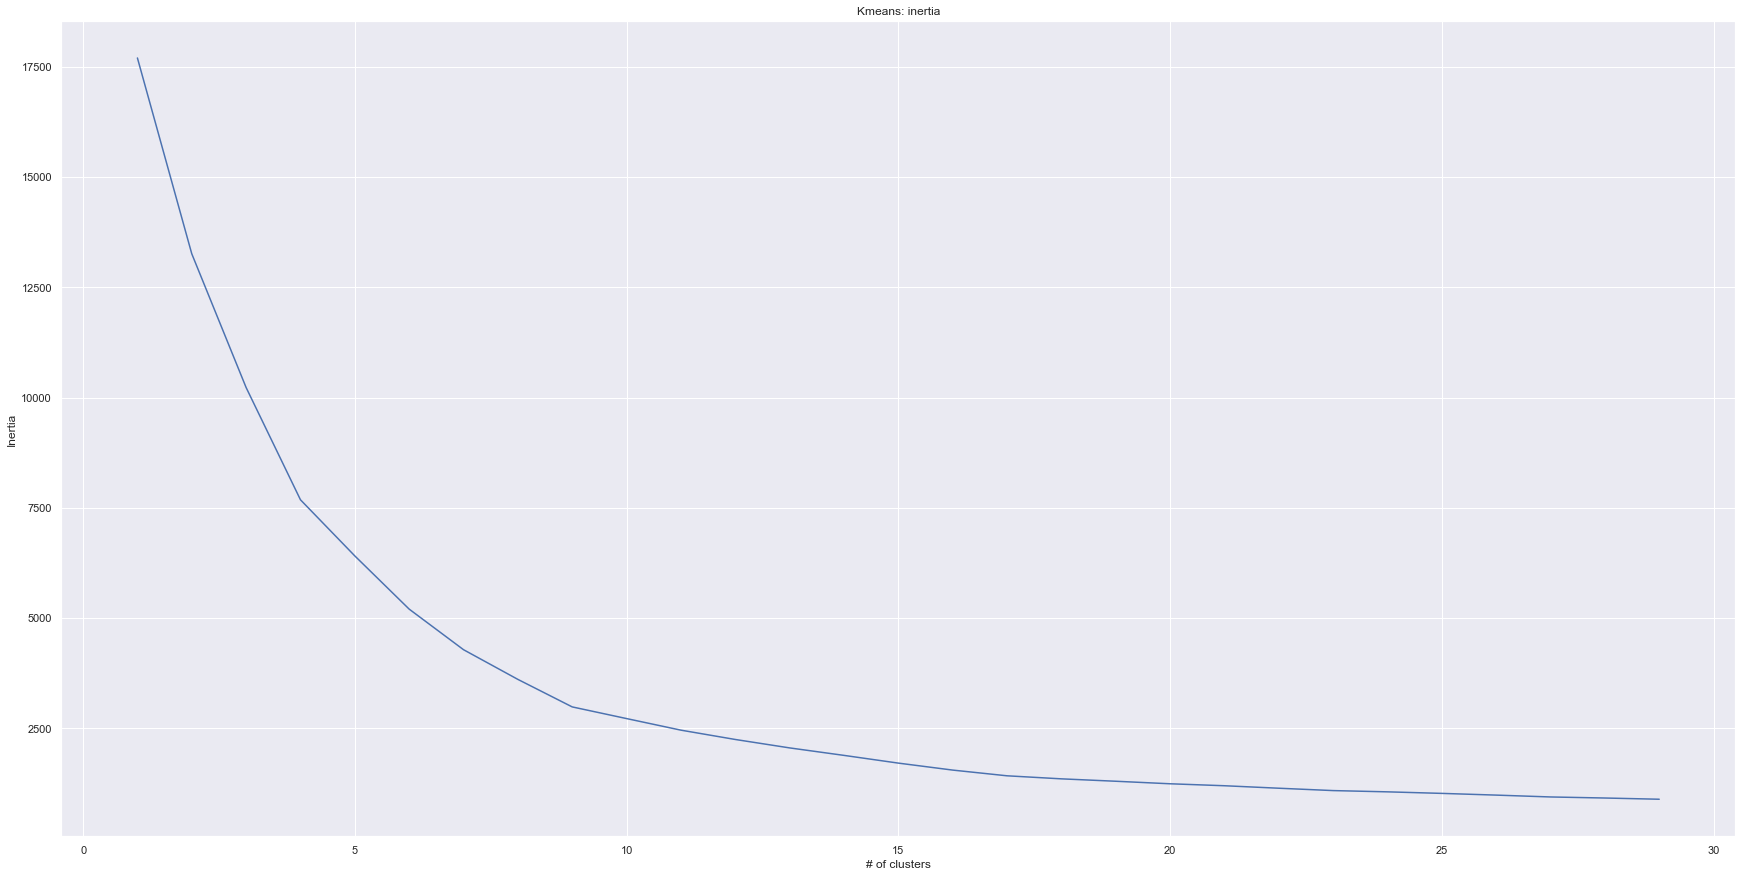

In [401]:
plt.plot(n_clusters, inertia)
plt.title('Kmeans: inertia')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.savefig('../c/KmeansInertia.png')
plt.show()

In [402]:
# try for 10

k_means = KMeans(n_clusters=10)

#Run the clustering algorithm
model = k_means.fit(X)
model

#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)

labels = k_means.labels_

# Calculating the silhouette coefficient, A high value is desirable
print(metrics.silhouette_score(X, labels, metric = 'euclidean'))

# CH score, A high value is desirable
print(metrics.calinski_harabasz_score(X, labels))

0.4914620769975957
2701.4299475453613


In [403]:
# try for other number of clusters (= 4)
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(X)
y_hat_4 = k_means_4.predict(X)
labels_4 = k_means_4.labels_
print(metrics.silhouette_score(X, labels_4, metric = 'euclidean'))
print(metrics.calinski_harabasz_score(X, labels_4))

0.44298133172637016
1658.4427932271055


In [404]:
# try for other number of clusters (= 3)
k_means_3 = KMeans(n_clusters=3)
model = k_means_3.fit(X)
y_hat_3 = k_means_3.predict(X)
labels_3 = k_means_3.labels_
print(metrics.silhouette_score(X, labels_3, metric = 'euclidean'))
print(metrics.calinski_harabasz_score(X, labels_3))

0.4408457620147509
1616.0288563480335


In [405]:
# try for other number of clusters (= 9)
k_means_9 = KMeans(n_clusters=9)
model = k_means_9.fit(X)
y_hat_9 = k_means_9.predict(X)
labels_9 = k_means_9.labels_
print(metrics.silhouette_score(X, labels_9, metric = 'euclidean'))
print(metrics.calinski_harabasz_score(X, labels_9))

0.485036620383454
2721.8480060948086


In [406]:
# try for other number of clusters (=5)
k_means_5 = KMeans(n_clusters=5)
model = k_means_5.fit(X)
y_hat_5 = k_means_5.predict(X)
labels_5 = k_means_5.labels_
print(metrics.silhouette_score(X, labels_5, metric = 'euclidean'))
print(metrics.calinski_harabasz_score(X, labels_5))

0.4796933072500037
1947.322993527219


In [407]:
# try for other number of clusters (=15)
k_means_15 = KMeans(n_clusters=15)
model = k_means_15.fit(X)
y_hat_15 = k_means_15.predict(X)
labels_15 = k_means_15.labels_
print(metrics.silhouette_score(X, labels_15, metric = 'euclidean'))
print(metrics.calinski_harabasz_score(X, labels_15))

0.4886172873333632
2923.2718431877965


In [408]:
# if choose n_clusters = 10, the clusters will be two small for svm
# but can use clusters as one more features for svm
#add label to the original dataframe

df['KmeansCluster'] = labels
df

,date,lat,lon,class,KmeansCluster
0,737401,48.980994,-122.688503,1,8
1,737362,48.971949,-122.700941,1,8
2,737439,48.939200,-122.661300,-1,5
3,737321,49.149394,-123.943134,1,8
4,737302,48.723779,-122.354431,-1,5
...,...,...,...,...,...
4421,737700,47.145673,-122.566734,-1,3
4422,737666,48.997938,-122.729890,-1,5
4423,737721,47.651710,-122.692750,-1,3
4424,737717,47.690120,-122.509780,-1,3


In [409]:
df.columns

Index(['date', 'lat', 'lon', 'class', 'KmeansCluster'], dtype='object')

In [410]:
new_columns = ['date', 'lat', 'lon', 'KmeansCluster', 'class']

In [411]:
df = df.reindex(columns = new_columns)

In [412]:
df.to_csv('../clusteredDF.csv')

In [413]:
df

,date,lat,lon,KmeansCluster,class
0,737401,48.980994,-122.688503,8,1
1,737362,48.971949,-122.700941,8,1
2,737439,48.939200,-122.661300,5,-1
3,737321,49.149394,-123.943134,8,1
4,737302,48.723779,-122.354431,5,-1
...,...,...,...,...,...
4421,737700,47.145673,-122.566734,3,-1
4422,737666,48.997938,-122.729890,5,-1
4423,737721,47.651710,-122.692750,3,-1
4424,737717,47.690120,-122.509780,3,-1


# Step 2 : Class_Weighted SVM - RBF

In [306]:
# find classifer for each cluster
# store each cluster into sub dataset (dataframe)
sub0 = data.loc[data['KmeansCluster'] == 0]
sub1 = data.loc[data['KmeansCluster'] == 1]
sub2 = data.loc[data['KmeansCluster'] == 2]

In [307]:
# divide each sub dataset into known and unverified/unprocessed group for later
sub0 = sub0.drop('KmeansCluster', 1)
sub0_k = sub0.loc[sub0['class'] != -1]
sub0_un = sub0.loc[sub0['class'] == -1]
sub0_un = sub0_un.drop('class', 1)


sub1 = sub1.drop('KmeansCluster', 1)
sub1_k = sub1.loc[sub1['class'] != -1]
sub1_un = sub1.loc[sub1['class'] == -1]
sub1_un = sub1_un.drop('class', 1)


sub2 = sub2.drop('KmeansCluster', 1)
sub2_k = sub2.loc[sub2['class'] != -1]
sub2_un = sub2.loc[sub2['class'] == -1]
sub2_un = sub2_un.drop('class', 1)

In [318]:
sub2_un

,date,lat,lon


In [316]:
sub2_k.loc[sub2_k['class'] == 1]

,date,lat,lon,class
0,737401,48.980994,-122.688503,1
1,737362,48.971949,-122.700941,1
3,737321,49.149394,-123.943134,1
824,737572,48.955587,-122.661037,1
914,737376,49.025831,-122.810653,1
946,737560,49.060215,-122.641648,1
1001,737583,48.777534,-122.418612,1
1059,737332,48.993892,-122.702242,1
3266,737654,48.927519,-122.745016,1
4114,737689,48.984269,-122.574809,1


In [242]:
# only cluster -0 and -4 have both known & unknown datapoints
vals0 = sub0_k.values
X0 = vals0[:, :-1]
y0 = vals0[:, -1]

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.1, random_state=550)

create_scaler = create_scaler_minmax
scaler = create_scaler()
scaler.fit(X0_train)
X0_train = scaler.transform(X0_train)
X0_test = scaler.transform(X0_test)

svm_clf0 = SVC(kernel='rbf', gamma='auto')
svm_clf0.fit(X0_train, y0_train)
y0_pred = svm_clf0.predict(X0_test)

# perforance
from sklearn.model_selection import cross_val_score
score0 = cross_val_score(svm_clf0, X0_train, y0_train, cv = 5)
print(score0)
print(score0.mean())

# prediction class for unknown data point
y0_pred_hat = svm_clf0.predict(sub0_un.values)
predic_class = []
predic_class = predic_class.append(y0_pred_hat)

ValueError: The number of classes has to be greater than one; got 1 class

In [319]:
# not-clustered / overall SVM model
whole = data.loc[data['class'] != -1]
whole = whole.drop('KmeansCluster', 1)

whole_un = data.loc[data['class'] == -1]
whole_un = whole_un.drop('class', 1)
whole_un = whole_un.drop('KmeansCluster', 1)

# split to X and y
# X is all the features' data, y is all the class data
whole_vals = whole.values
X = whole_vals[:, :-1]
y = whole_vals[:, -1]

In [320]:
# split the data into train and test set（10%）randomly
# scale the data before using SVM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

create_scaler = create_scaler_minmax
scaler = create_scaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [321]:
svm_clf = SVC(kernel='rbf', gamma='auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

# performance
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00       620
     class 1       0.00      0.00      0.00         5

    accuracy                           0.99       625
   macro avg       0.50      0.50      0.50       625
weighted avg       0.98      0.99      0.99       625



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [322]:
predic_class_whole = svm_clf.predict(whole_un.values)

In [325]:
whole_un['predic_class'] = predic_class_whole

In [327]:
whole_un['predic_class'].astype(int)

2       0
4       0
5       0
7       0
10      0
       ..
4421    0
4422    0
4423    0
4424    0
4425    0
Name: predic_class, Length: 2344, dtype: int64

In [328]:
whole_un.loc[whole_un['predic_class'] == 1]

,date,lat,lon,predic_class


***Reference***
1. imbalance data 

https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100

should upsample the data (<10k), check performance matrics

https://stats.stackexchange.com/questions/122095/does-support-vector-machine-handle-imbalanced-dataset

https://stats.stackexchange.com/questions/94295/svm-for-unbalanced-data

class weighted SVM

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

   
2. change datetime type into integers 

https://www.geeksforgeeks.org/python-pandas-timestamp-toordinal/

3. supervised clustering 

https://stats.stackexchange.com/questions/37587/supervised-clustering-or-classification

4. kmeans normalization

https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering

5. find best k for kmeans

https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

6. cluster then classify

https://towardsdatascience.com/cluster-then-predict-for-classification-tasks-142fdfdc87d6